In [23]:
#Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import timeit
from citipy import citipy
# Import the requests library.
import requests
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [4]:
# Use the citipy module to determine city based on latitude and longitude.
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
    
# Print the city count to confirm sufficient count.
len(cities)




644

### Weather Information for Boston


In [5]:
# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3afe16e54de8c0c78af64877c92406f9&q=Boston


In [6]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather


<Response [200]>

In [7]:
# Get the JSON text of the 'Get' request.
boston_data = city_weather.json()
boston_data

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 38.21,
  'feels_like': 35.24,
  'temp_min': 34.99,
  'temp_max': 40.21,
  'pressure': 1013,
  'humidity': 53},
 'visibility': 10000,
 'wind': {'speed': 4, 'deg': 290, 'gust': 10},
 'clouds': {'all': 75},
 'dt': 1638306991,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1638273190,
  'sunset': 1638306795},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [8]:
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [9]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 40.21 53 75 4


In [10]:
boston_data['dt']

1638306991

In [11]:
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')


'2021-11-30 21:16:31'

### City Weather Data for 500 cities

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        #time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | batemans bay
Processing Record 3 of Set 1 | pisco
Processing Record 4 of Set 1 | ravar
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | hokitika
Processing Record 7 of Set 1 | beloha
Processing Record 8 of Set 1 | dingle
Processing Record 9 of Set 1 | nizwa
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | jinan
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | amahai
Processing Record 14 of Set 1 | esperance
Processing Record 15 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 16 of Set 1 | mount pleasant
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | san nicolas
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | dikson
Processing Record 22 of Set 1 | faanui
Processing Record 23 o

Processing Record 41 of Set 4 | half moon bay
Processing Record 42 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 43 of Set 4 | antalaha
Processing Record 44 of Set 4 | castro
Processing Record 45 of Set 4 | marcona
City not found. Skipping...
Processing Record 46 of Set 4 | kunashak
Processing Record 47 of Set 4 | cam ranh
Processing Record 48 of Set 4 | port lincoln
Processing Record 49 of Set 4 | chernitsyno
Processing Record 50 of Set 4 | bam
Processing Record 1 of Set 5 | leningradskiy
Processing Record 2 of Set 5 | mahibadhoo
Processing Record 3 of Set 5 | bubaque
Processing Record 4 of Set 5 | cherskiy
Processing Record 5 of Set 5 | walvis bay
Processing Record 6 of Set 5 | prince rupert
Processing Record 7 of Set 5 | kilindoni
Processing Record 8 of Set 5 | naushahro firoz
Processing Record 9 of Set 5 | praia
Processing Record 10 of Set 5 | monrovia
Processing Record 11 of Set 5 | dewas
Processing Record 12 of Set 5 | qaqortoq
Processing Record 13 of Set 5

Processing Record 31 of Set 8 | manzhouli
Processing Record 32 of Set 8 | arraial do cabo
Processing Record 33 of Set 8 | moose factory
Processing Record 34 of Set 8 | rocha
Processing Record 35 of Set 8 | lloret de mar
Processing Record 36 of Set 8 | geraldton
Processing Record 37 of Set 8 | the valley
Processing Record 38 of Set 8 | chengde
Processing Record 39 of Set 8 | ilulissat
Processing Record 40 of Set 8 | san patricio
Processing Record 41 of Set 8 | rapid valley
Processing Record 42 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 43 of Set 8 | winnemucca
Processing Record 44 of Set 8 | alofi
Processing Record 45 of Set 8 | ribas do rio pardo
Processing Record 46 of Set 8 | ilhabela
Processing Record 47 of Set 8 | port elizabeth
Processing Record 48 of Set 8 | sulangan
Processing Record 49 of Set 8 | santiago del estero
Processing Record 50 of Set 8 | saint-pierre
Processing Record 1 of Set 9 | motihari
Processing Record 2 of Set 9 | rundu
Proce

City not found. Skipping...
Processing Record 17 of Set 12 | sur
Processing Record 18 of Set 12 | wakefield
Processing Record 19 of Set 12 | skibbereen
Processing Record 20 of Set 12 | vicksburg
Processing Record 21 of Set 12 | sao filipe
Processing Record 22 of Set 12 | mae hong son
Processing Record 23 of Set 12 | bombay
Processing Record 24 of Set 12 | haines junction
Processing Record 25 of Set 12 | wukari
Processing Record 26 of Set 12 | alice springs
Processing Record 27 of Set 12 | blind river
Processing Record 28 of Set 12 | mocuba
Processing Record 29 of Set 12 | chimbote
Processing Record 30 of Set 12 | beringovskiy
Processing Record 31 of Set 12 | bereda
Processing Record 32 of Set 12 | sault sainte marie
Processing Record 33 of Set 12 | baghdad
Processing Record 34 of Set 12 | nome
Processing Record 35 of Set 12 | rudbar
Processing Record 36 of Set 12 | ribeira grande
Processing Record 37 of Set 12 | kununurra
Processing Record 38 of Set 12 | lazaro cardenas
Processing Reco

In [13]:
len(city_data)

596

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,35.80,74,100,2.35,US,2021-11-30 21:18:15
1,Batemans Bay,-35.7167,150.1833,73.20,81,100,2.46,AU,2021-11-30 21:19:33
2,Pisco,-13.7000,-76.2167,69.85,68,0,21.85,PE,2021-11-30 21:20:24
3,Ravar,31.2656,56.8055,53.80,41,0,3.06,IR,2021-11-30 21:20:25
4,Rikitea,-23.1203,-134.9692,76.44,75,0,21.07,PF,2021-11-30 21:16:57
5,Hokitika,-42.7167,170.9667,62.94,70,98,2.66,NZ,2021-11-30 21:20:26
6,Beloha,-25.1667,45.0500,72.95,89,62,9.10,MG,2021-11-30 21:20:26
7,Dingle,10.9995,122.6711,74.62,85,100,3.31,PH,2021-11-30 21:20:27
8,Nizwa,22.9333,57.5333,67.10,64,72,1.59,OM,2021-11-30 21:20:27
9,Punta Arenas,-53.1500,-70.9167,62.71,39,0,24.16,CL,2021-11-30 21:20:28


In [15]:
column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]
city_data_df = city_data_df[column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2021-11-30 21:18:15,42.6001,-73.9662,35.80,74,100,2.35
1,Batemans Bay,AU,2021-11-30 21:19:33,-35.7167,150.1833,73.20,81,100,2.46
2,Pisco,PE,2021-11-30 21:20:24,-13.7000,-76.2167,69.85,68,0,21.85
3,Ravar,IR,2021-11-30 21:20:25,31.2656,56.8055,53.80,41,0,3.06
4,Rikitea,PF,2021-11-30 21:16:57,-23.1203,-134.9692,76.44,75,0,21.07


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

### Scatter plots

In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]



###### latitude vs. max temperature.

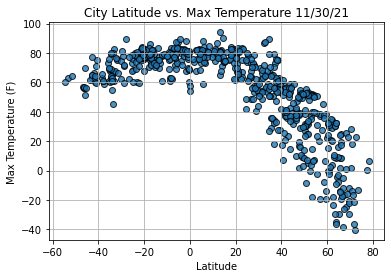

In [46]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, max_temps, edgecolor = "black", 
            linewidth = 1, marker = "o",
            alpha = 0.8, label = "Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/lat_vs_maxtemp.png")
# Show plot.
plt.show()


###### latitude vs. humidity

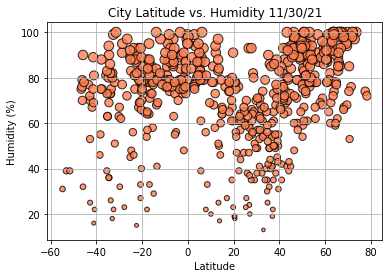

In [47]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats, humidity, color = "coral", edgecolor = "black", 
            linewidth = 1, marker = "o",
            alpha = 0.8, label = "Cities", s = humidity)
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/lat_vshumidity.png")
# Show plot.
plt.show()


###### latitude vs. cloudiness

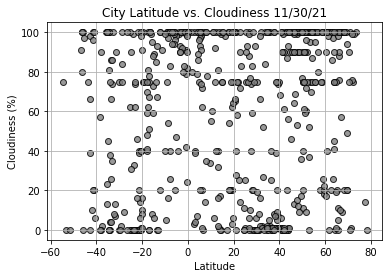

In [44]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats, cloudiness, color = "grey", edgecolor = "black", 
            linewidth = 1, marker = "o",
            alpha = 0.8, label = "Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/lat_vs_.png")
# Show plot.
plt.show()


###### latitude vs. wind speed

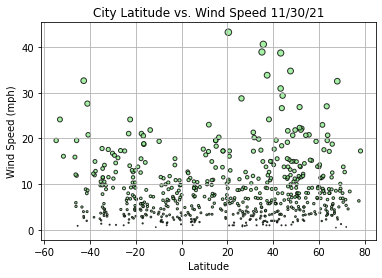

In [45]:
# Build the scatter plot for latitude vs. windspeed.
plt.scatter(lats, wind_speed, color = "lightgreen", edgecolor = "black", 
            linewidth = 1, marker = "o",
            alpha = 0.8, label = "Cities", s = wind_speed)
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()
